# Understanding Seattle Airbnb Data



- Steps involved in Data Preparation  
    - Retrieve Data  
    - Overview and Exploration  
    - Treatment of missing data  
    - Removal of irrelevant columns  
    - Removal of unstructured text columns  
    - Feature engineering of amenities columns  
    - Transforming strings into numerical values  
    - Encoding of categorical variables  
    - Analysis of missing values  
- Below are the set of Business Questions  we are answering using our analysis
    1. What are the most prominent features that help predicting Airbnb listing prices? 
    2. What is the distribution of Airbnb prices in Seattle?
    3. What are the most expensive areas to rent in Seattle?
- Conclusion 

##  Data Preparation

###  Retrieve Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from IPython import display
import collections
from time import time
from itertools import chain
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
import seaborn as sns


%matplotlib inline

In [3]:
df_listings = pd.read_csv("data/listings.csv")
df_calendar = pd.read_csv("data/calendar.csv")
df_reviews = pd.read_csv("data/reviews.csv")

###  Overview and Exploration

In [4]:
# Set some display options
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', 2000)

In [5]:
# Check number of rows and columns
print(df_listings.shape)
print(df_calendar.shape)
print(df_reviews.shape)

(3818, 92)
(1393570, 4)
(84849, 6)


In [6]:
# Get column names
print(df_listings.columns.values)
print(df_calendar.columns.values)
print(df_reviews.columns.values)

['id' 'listing_url' 'scrape_id' 'last_scraped' 'name' 'summary' 'space'
 'description' 'experiences_offered' 'neighborhood_overview' 'notes'
 'transit' 'thumbnail_url' 'medium_url' 'picture_url' 'xl_picture_url'
 'host_id' 'host_url' 'host_name' 'host_since' 'host_location'
 'host_about' 'host_response_time' 'host_response_rate'
 'host_acceptance_rate' 'host_is_superhost' 'host_thumbnail_url'
 'host_picture_url' 'host_neighbourhood' 'host_listings_count'
 'host_total_listings_count' 'host_verifications' 'host_has_profile_pic'
 'host_identity_verified' 'street' 'neighbourhood'
 'neighbourhood_cleansed' 'neighbourhood_group_cleansed' 'city' 'state'
 'zipcode' 'market' 'smart_location' 'country_code' 'country' 'latitude'
 'longitude' 'is_location_exact' 'property_type' 'room_type'
 'accommodates' 'bathrooms' 'bedrooms' 'beds' 'bed_type' 'amenities'
 'square_feet' 'price' 'weekly_price' 'monthly_price' 'security_deposit'
 'cleaning_fee' 'guests_included' 'extra_people' 'minimum_nights'
 'm

In [7]:
df_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


There are 3 datasets:

- listings
- calendar
- reviews

The most relevant dataset for our analysis is the listings dataset. The calendar dataset is relevant for answering the third question about popular times.

Since the reviews dataset is mainly unstructured data, we will postpone any analysis.

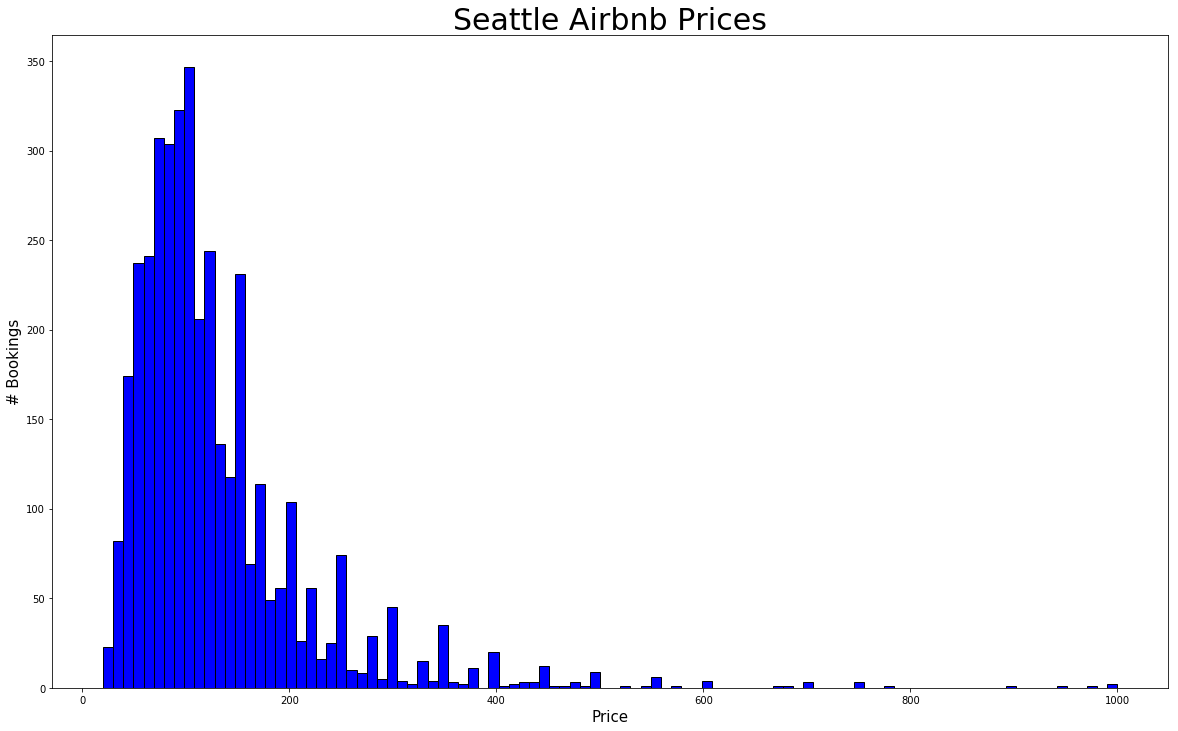

In [8]:
fig, ax = plt.subplots(figsize=(20, 12))

plt.hist(df_listings['price'].replace('[\$,]', '', regex=True).astype(float), color = 'blue', edgecolor = 'black',
         bins = 100)
ax.set_title('Seattle Airbnb Prices', fontsize=30)
ax.set_xlabel('Price')
ax.set_ylabel('# Bookings')
ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)

 There is a large range of prices for Boston homes, Upto 1000 dollar per day are paid. Prices values that are between 50-200 dollar per day are preferred the most

In [9]:
df_listings['price'].replace('[\$,]', '', regex=True).astype(float).describe()

count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

### Treatment of missing data

In [10]:
# Check for missing values in listings
(df_listings.isnull().sum()/len(df_listings)).sort_values(ascending=False)

license                             1.000000
square_feet                         0.974594
monthly_price                       0.602672
security_deposit                    0.511262
weekly_price                        0.473808
notes                               0.420639
neighborhood_overview               0.270299
cleaning_fee                        0.269775
transit                             0.244631
host_about                          0.224987
host_acceptance_rate                0.202462
review_scores_accuracy              0.172342
review_scores_checkin               0.172342
review_scores_value                 0.171818
review_scores_location              0.171556
review_scores_cleanliness           0.171032
review_scores_communication         0.170508
review_scores_rating                0.169460
reviews_per_month                   0.164222
first_review                        0.164222
last_review                         0.164222
space                               0.149031
host_respo

In [11]:
# Check columns >=25% missing values
[cols for cols in df_listings.columns.values if (df_listings[cols].isnull().sum()/len(df_listings))>=0.25]

['neighborhood_overview',
 'notes',
 'square_feet',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'license']

In [12]:
# Distribution of missing values.
(df_listings.isnull().sum()/len(df_listings)).describe()

count    92.000000
mean      0.084893
std       0.181492
min       0.000000
25%       0.000000
50%       0.000000
75%       0.136983
max       1.000000
dtype: float64

There are a number of columns containing missing values, of which license has no data at all.

There are no missing values in the price column, perhaps this column can be used instead of weekly and monthly prices. 

In [13]:
df_listings[['monthly_price', 'weekly_price', 'price']].head(5)

,monthly_price,weekly_price,price
0,NaN,NaN,$85.00
1,"$3,000.00","$1,000.00",$150.00
2,NaN,NaN,$975.00
3,"$2,300.00",$650.00,$100.00
4,NaN,NaN,$450.00


In [14]:
df_listings[['monthly_price', 'weekly_price', 'price']].replace('[\$,]','',regex=True).astype(float).corr()

,monthly_price,weekly_price,price
monthly_price,1.000000,0.942644,0.873450
weekly_price,0.942644,1.000000,0.937861
price,0.873450,0.937861,1.000000


The price field seems to indicate a daily price, therefore I will drop the monthly and weekly prices from the dataset due to a large number of missing values. The price field should act as a good substitute.

In [15]:
df_listings[['property_type']].head(5)

,property_type
0,Apartment
1,Apartment
2,House
3,Apartment
4,House


In [16]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to everything!
1,7202016,39087409,2015-07-20,32440555,Frank,"Kelly has a great room in a very central location. \r\nBeautiful building , architecture and a style that we really like. \r\nWe felt guite at home here and wish we had spent more time.\r\nWent for a walk and found Seattle Center with a major food festival in progress. What a treat.\r\nVisited the Space Needle and the Chihuly Glass exhibit. Then Pikes Place Market. WOW. Thanks for a great stay."
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighborhood. This is the kind of apartment I wish I had!\r\n\r\nDidn't really get to meet Kelly until I was on my out, but she was always readily available by phone. \r\n\r\nI believe the only ""issue"" (if you want to call it that) was finding a place to park, but I sincerely doubt its easy to park anywhere in a residential area after 5 pm on a Friday"
3,7202016,40813543,2015-08-02,33671805,George,"Close to Seattle Center and all it has to offer - ballet, theater, museum, Space Needle, restaurants of all ilk just blocks away, and the Metropolitan (probably the coolest grocer you'll ever find). Easy to find and Kelly was warm, welcoming, and really interesting to talk to."
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating in a great neighborhood. She has some great coffee and while I wasn't around much during my stay the time I spent interacting with her was very pleasant. \r\n\r\nThe apartment is in a great location and very close to the Seattle Center. The neighborhood itself has a lot of good food as well!


In [17]:
df_reviews.shape

(84849, 6)

In [18]:
df_reviews.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

In [19]:
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [20]:
df_calendar.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

After looking at the three datasets, I will go ahead with only listings file as that dataset is sufficient for answering my questions. We can analyse review responses from review file using NLP and merge it to listing dataset but it would be too complex. Calendar data does not have any highly relevant information for my questions

### Data Cleaning and Encoding

**Columns to be dropped:** 'host_listings_count','calendar_last_scraped','calendar_updated','country','zipcode','country_code','experiences_offered','first_review','has_availability','host_id','host_location','host_name','host_neighbourhood','host_picture_url','host_thumbnail_url','host_url','id','jurisdiction_names','last_review','last_scraped','license','listing_url','medium_url','monthly_price','neighbourhood','picture_url','scrape_id','square_feet','thumbnail_url','weekly_price','xl_picture_url','name', 'summary', 'space', 'description', 'neighborhood_overview', 'notes', 'transit','street','city','state','host_about','host_acceptance_rate','security_deposit','cleaning_fee','license',
'market','smart_location','latitude','longitude','neighbourhood_cleansed'

We will be dropping the above columns as some of them have about 80% missing data, some of them are irrelevant and other reasons.
Some of the them are having long texg descriptions and web urls which I am not analyzing in the current scope. Data is almost same in avg latitude and longitude as its only one city, dropping these as well

**Cleaning Steps:**
1. Drop above columns
2. Check for missing values in rows
3. Do the missing value treatment for rows and columns
4. Price variables to be converted to float format and make changes accordingly for percentages and other variables which we want to be treated as numbers instead of objects and vice versa
5. Transform Boolean variables and encode Categorical variables wherever required

In [21]:
#Dropping irrelevant columns
drop_cols =['host_listings_count','calendar_last_scraped','calendar_updated','country','zipcode','country_code','experiences_offered','first_review','has_availability','host_id','host_location','host_name','host_neighbourhood','host_picture_url','host_thumbnail_url','host_url','id','jurisdiction_names','last_review','last_scraped','license','listing_url','medium_url','monthly_price','neighbourhood','picture_url','scrape_id','square_feet','thumbnail_url','weekly_price','xl_picture_url','name', 'summary', 'space', 'description', 'neighborhood_overview', 'notes', 'transit','street','city','state','host_about','host_acceptance_rate','security_deposit','cleaning_fee','license','market','smart_location','latitude','longitude','neighbourhood_cleansed']
df_listings_cleaned = df_listings.drop(drop_cols, axis=1)

In [22]:
df_listings_cleaned.shape

(3818, 42)

In [23]:
#No.of rows with missing data
print(sum(df_listings_cleaned.isnull().any(axis=1)))

984


About 25% of the records in the data have atleast one missing value

In [24]:
# How much data is missing in each row of the dataset?
missing_rows = pd.DataFrame (df_listings_cleaned.isnull().sum (axis = 1), columns = ['missing_in_rows'])
print(len(missing_rows))
missing_rows.head()

3818


,missing_in_rows
0,0
1,0
2,0
3,10
4,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EC6D4DC3C8>]],
      dtype=object)

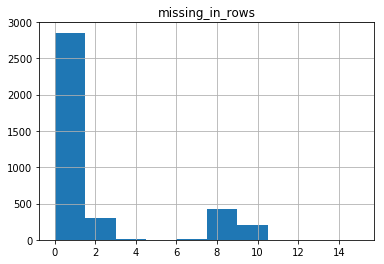

In [25]:
missing_rows.hist()

From above distribution, it looks like our data set can be split into two subsets. One with missing rows less than or equal to 8 and the other with missing rows greater than 8

In [26]:
df_listings_cleaned = df_listings_cleaned.join (missing_rows)
df_listings_cleaned.head()

,host_since,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,missing_in_rows
0,2011-08-11,within a few hours,96%,f,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,Queen Anne,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air Conditioning"",Kitchen,Heating,""Family/Kid Friendly"",Washer,Dryer}",$85.00,2,$5.00,1,365,14,41,71,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,f,moderate,f,f,2,4.07,0
1,2013-02-21,within an hour,98%,t,6.0,"['email', 'phone', 'facebook', 'linkedin', 'reviews', 'jumio']",t,t,Queen Anne,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free Parking on Premises"",""Buzzer/Wireless Intercom"",Heating,""Family/Kid Friendly"",Washer,Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",""First Aid Kit"",""Safety Card"",""Fire Extinguisher"",Essentials}",$150.00,1,$0.00,2,90,13,13,16,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,strict,t,t,6,1.48,0
2,2014-06-12,within a few hours,67%,f,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,Queen Anne,t,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air Conditioning"",Kitchen,""Free Parking on Premises"",""Pets Allowed"",""Pets live on this property"",Dog(s),Cat(s),""Hot Tub"",""Indoor Fireplace"",Heating,""Family/Kid Friendly"",Washer,Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",Essentials,Shampoo}",$975.00,10,$25.00,4,30,1,6,17,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,strict,f,f,2,1.15,0
3,2013-11-06,NaN,NaN,f,1.0,"['email', 'phone', 'facebook', 'reviews', 'jumio']",t,t,Queen Anne,t,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor Fireplace"",Heating,""Family/Kid Friendly"",Washer,Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",""Safety Card"",""Fire Extinguisher"",Essentials,Shampoo}",$100.00,1,$0.00,1,1125,0,0,0,143,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,flexible,f,f,1,NaN,10
4,2011-11-29,within an hour,100%,f,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Queen Anne,t,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Kitchen,Heating,""Family/Kid Friendly"",""Smoke Detector"",""Carbon Monoxide Detector"",""First Aid Kit"",""Fire Extinguisher"",Essentials,Shampoo}",$450.00,6,$15.00,1,1125,30,60,90,365,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,f,f,strict,f,f,1,0.89,0


In [27]:
df_listings_low = df_listings_cleaned[df_listings_cleaned['missing_in_rows']<=8]
df_listings_high = df_listings_cleaned[df_listings_cleaned['missing_in_rows']>8]
print(len(df_listings_low),len(df_listings_high))

3604 214


Out of 3818 records, 214 records have more than 8 missing values which contribute to ~6% of the data. This is safe to remove as the no.of rows with missing values greater than 8 are low.

In [28]:
df_listings_1 = df_listings_low.drop('missing_in_rows',axis=1)

### Data type transformation and feature encoding

In [29]:
pd.set_option('display.max_columns', 100)
df_listings_1.head()

,host_since,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2011-08-11,within a few hours,96%,f,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,Queen Anne,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air Conditioning"",Kitchen,Heating,""Family/Kid Friendly"",Washer,Dryer}",$85.00,2,$5.00,1,365,14,41,71,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,f,moderate,f,f,2,4.07
1,2013-02-21,within an hour,98%,t,6.0,"['email', 'phone', 'facebook', 'linkedin', 'reviews', 'jumio']",t,t,Queen Anne,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free Parking on Premises"",""Buzzer/Wireless Intercom"",Heating,""Family/Kid Friendly"",Washer,Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",""First Aid Kit"",""Safety Card"",""Fire Extinguisher"",Essentials}",$150.00,1,$0.00,2,90,13,13,16,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,strict,t,t,6,1.48
2,2014-06-12,within a few hours,67%,f,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,Queen Anne,t,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air Conditioning"",Kitchen,""Free Parking on Premises"",""Pets Allowed"",""Pets live on this property"",Dog(s),Cat(s),""Hot Tub"",""Indoor Fireplace"",Heating,""Family/Kid Friendly"",Washer,Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",Essentials,Shampoo}",$975.00,10,$25.00,4,30,1,6,17,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,strict,f,f,2,1.15
4,2011-11-29,within an hour,100%,f,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Queen Anne,t,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Kitchen,Heating,""Family/Kid Friendly"",""Smoke Detector"",""Carbon Monoxide Detector"",""First Aid Kit"",""Fire Extinguisher"",Essentials,Shampoo}",$450.00,6,$15.00,1,1125,30,60,90,365,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,f,f,strict,f,f,1,0.89
5,2010-12-25,NaN,NaN,f,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Queen Anne,t,House,Private room,2,1.0,1.0,1.0,Real Bed,"{""Wireless Internet"",""Free Parking on Premises"",Heating,""Smoke Detector"",Essentials,Shampoo}",$120.00,1,$30.00,1,6,0,0,27,302,17,95.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,strict,f,f,1,2.45


In [30]:
df_listings_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3604 entries, 0 to 3817
Data columns (total 42 columns):
host_since                          3604 non-null object
host_response_time                  3292 non-null object
host_response_rate                  3292 non-null object
host_is_superhost                   3604 non-null object
host_total_listings_count           3604 non-null float64
host_verifications                  3604 non-null object
host_has_profile_pic                3604 non-null object
host_identity_verified              3604 non-null object
neighbourhood_group_cleansed        3604 non-null object
is_location_exact                   3604 non-null object
property_type                       3604 non-null object
room_type                           3604 non-null object
accommodates                        3604 non-null int64
bathrooms                           3592 non-null float64
bedrooms                            3598 non-null float64
beds                                

In [31]:
#Function to clean price variables
def price_clean(df, price_cols):
    """
    Cleans the prices by removing $ sign and converting numbers to float

    Parameters:
    df : Dataframe
    price_cols : the column names that need transformation

    """
    for col in price_cols:
        df[col] = df[col].str[1:].str.replace(',','').astype(float)

In [32]:
#Function to clean boolean variables
def bool_clean(df, bool_cols):
    """
    Cleans the boolean variables by transforming t and f to '0' and '1'

    Parameters:
    df : Dataframe
    bool_cols : the column names that need transformation

    """
    for col in bool_cols:
        df[col].replace({'t':1, 'f':0}, inplace=True)

In [33]:
#Clean Price columns
price_cols = ['price','extra_people']
#Calling function to clean price variables
price_clean(df_listings_1, price_cols)

In [34]:
#Clean Percentage columns
df_listings_1['host_response_rate'] = df_listings_1['host_response_rate'].str[:-1].astype(float)/100

In [35]:
#Fixing Boolean columns
bool_cols = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'is_location_exact',
               'requires_license', 'instant_bookable', 'require_guest_profile_picture', 
               'require_guest_phone_verification']
#Calling function to clean boolean variables
bool_clean(df_listings_1, bool_cols)

In [36]:
df_listings_1.head()

,host_since,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2011-08-11,within a few hours,0.96,0,3.0,"['email', 'phone', 'reviews', 'kba']",1,1,Queen Anne,1,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air Conditioning"",Kitchen,Heating,""Family/Kid Friendly"",Washer,Dryer}",85.0,2,5.0,1,365,14,41,71,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,0,0,moderate,0,0,2,4.07
1,2013-02-21,within an hour,0.98,1,6.0,"['email', 'phone', 'facebook', 'linkedin', 'reviews', 'jumio']",1,1,Queen Anne,1,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free Parking on Premises"",""Buzzer/Wireless Intercom"",Heating,""Family/Kid Friendly"",Washer,Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",""First Aid Kit"",""Safety Card"",""Fire Extinguisher"",Essentials}",150.0,1,0.0,2,90,13,13,16,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,strict,1,1,6,1.48
2,2014-06-12,within a few hours,0.67,0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",1,1,Queen Anne,1,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air Conditioning"",Kitchen,""Free Parking on Premises"",""Pets Allowed"",""Pets live on this property"",Dog(s),Cat(s),""Hot Tub"",""Indoor Fireplace"",Heating,""Family/Kid Friendly"",Washer,Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",Essentials,Shampoo}",975.0,10,25.0,4,30,1,6,17,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,strict,0,0,2,1.15
4,2011-11-29,within an hour,1.00,0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",1,1,Queen Anne,1,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Kitchen,Heating,""Family/Kid Friendly"",""Smoke Detector"",""Carbon Monoxide Detector"",""First Aid Kit"",""Fire Extinguisher"",Essentials,Shampoo}",450.0,6,15.0,1,1125,30,60,90,365,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,0,0,strict,0,0,1,0.89
5,2010-12-25,NaN,NaN,0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",1,1,Queen Anne,1,House,Private room,2,1.0,1.0,1.0,Real Bed,"{""Wireless Internet"",""Free Parking on Premises"",Heating,""Smoke Detector"",Essentials,Shampoo}",120.0,1,30.0,1,6,0,0,27,302,17,95.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,strict,0,0,1,2.45


In [37]:
#Check for columns with null values
df_listings_1.isnull().sum()[df_listings_1.isnull().sum()>0]

host_response_time             312
host_response_rate             312
bathrooms                       12
bedrooms                         6
review_scores_rating           433
review_scores_accuracy         444
review_scores_cleanliness      439
review_scores_checkin          444
review_scores_communication    437
review_scores_location         441
review_scores_value            442
reviews_per_month              421
dtype: int64

There are 13 columns out of 45 which still have missing values. 
1. We cannot have NaN or 0 in bathrooms and bedrooms so lets delete the rows as they are very low in number
2. For all review related columns, we can replace NaN with 0 which basically means they did not give any reviews
3. For host response time, lets replace with mode as it is an object variable and for host response rate, lets consider average of the entire column

In [40]:
#Deleting rows with missing values in below columns
df_listings_1.dropna(subset=['bedrooms', 'bathrooms'], inplace=True)

In [41]:
#Replacing missing values with 0
cols = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','reviews_per_month']
for col in cols:
    df_listings_1[col].fillna(0, inplace=True)

In [42]:
#Replacing missing values with mean and mode
df_listings_1['host_response_time'].fillna(df_listings_1['host_response_time'].mode()[0], inplace=True)
df_listings_1['host_response_rate'].fillna(df_listings_1['host_response_rate'].mean(), inplace=True)

In [43]:
#Check if there are anymore null values
df_listings_1.isnull().sum()[df_listings_1.isnull().sum()>0]

Series([], dtype: int64)

We have treated all missing data so far, we will now encode the categorical variables

Out of all the categorical variables, host_verifications and amenities require multi level encoding as they include multiple levels with separators. Below is the split of those variables

In [44]:
df_listings_1.host_response_time.unique()

array(['within a few hours', 'within an hour', 'within a day',
       'a few days or more'], dtype=object)

In [45]:
#Encode responde time variable
df_listings_1.host_response_time.replace({'within an hour': 4,'within a few hours': 3,'within a day': 2,'a few days or more': 1}, inplace=True)

In [47]:
#Identify and define variable that are categorical and multi level as we have to encode them separately
multi_categ = ['host_verifications', 'amenities']
categ = ['neighbourhood_group_cleansed','property_type', 'room_type', 'bed_type',  'cancellation_policy']

#Categorical single encoding
df_listings_2 = pd.get_dummies(df_listings_1, columns=categ)
df_listings_2.shape

(3586, 81)

In [48]:
#remove quotes and other brackets, get the list and encode values
host_verifications_encoded = df_listings_1.host_verifications.apply(eval).str.join('|').str.get_dummies()
amenities_encoded = df_listings_1.amenities.str.strip('{}').str.replace('"','').str.split(',').str.join('|').str.get_dummies()

In [49]:
#Check
host_verifications_encoded.head()

,amex,email,facebook,google,jumio,kba,linkedin,manual_offline,manual_online,phone,photographer,reviews,sent_id,weibo
0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
1,0,1,1,0,1,0,1,0,0,1,0,1,0,0
2,0,1,0,1,1,0,0,0,0,1,0,1,0,0
4,0,1,1,0,0,1,0,0,0,1,0,1,0,0
5,0,1,1,0,0,1,0,0,0,1,0,1,0,0


In [50]:
#Check
amenities_encoded.head()

,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,Dryer,Elevator in Building,Essentials,Family/Kid Friendly,Fire Extinguisher,First Aid Kit,Free Parking on Premises,Gym,Hair Dryer,Hangers,Heating,Hot Tub,Indoor Fireplace,Internet,Iron,Kitchen,Laptop Friendly Workspace,Lock on Bedroom Door,Other pet(s),Pets Allowed,Pets live on this property,Pool,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet
0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
1,0,0,0,1,0,1,0,0,0,1,0,1,1,1,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1
2,0,1,0,0,1,1,1,1,0,1,0,1,1,0,0,1,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1
4,0,0,0,0,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1


In [51]:
#Combine the encoded datasets to the main dataframe
df_listings_2 = pd.concat([df_listings_2, host_verifications_encoded], axis=1)
df_listings_2 = pd.concat([df_listings_2, amenities_encoded], axis=1)
df_listings_2.shape


(3586, 136)

In [52]:
#Drop Original columns from the dataset
df_listings_2.drop(multi_categ, axis=1, inplace=True)

#Lets convert host_since to no.of years the user has been on Airbnb
df_listings_2.host_since = pd.to_datetime(df_listings_2.host_since).apply(lambda x: 2019 - x.year)

df_listings_2.head()

,host_since,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,neighbourhood_group_cleansed_Ballard,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,...,kba,linkedin,manual_offline,manual_online,phone,photographer,reviews,sent_id,weibo,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,Dryer,Elevator in Building,Essentials,Family/Kid Friendly,Fire Extinguisher,First Aid Kit,Free Parking on Premises,Gym,Hair Dryer,Hangers,Heating,Hot Tub,Indoor Fireplace,Internet,Iron,Kitchen,Laptop Friendly Workspace,Lock on Bedroom Door,Other pet(s),Pets Allowed,Pets live on this property,Pool,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet
0,8,3,0.960000,0,3.0,1,1,1,4,1.0,1.0,1.0,85.0,2,5.0,1,365,14,41,71,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,0,0,0,0,2,4.07,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
1,6,4,0.980000,1,6.0,1,1,1,4,1.0,1.0,1.0,150.0,1,0.0,2,90,13,13,16,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,1,1,6,1.48,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,1,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1
2,5,3,0.670000,0,2.0,1,1,1,11,4.5,5.0,7.0,975.0,10,25.0,4,30,1,6,17,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,0,0,2,1.15,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,1,1,0,0,1,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1
4,8,4,1.000000,0,2.0,1,1,1,6,2.0,3.0,3.0,450.0,6,15.0,1,1125,30,60,90,365,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,0,0,0,0,1,0.89,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1
5,9,4,0.949013,0,1.0,1,1,1,2,1.0,1.0,1.0,120.0,1,30.0,1,6,0,0,27,302,17,95.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,0,0,1,2.45,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1


### Modelling for intrpreting business questions

As we are looking to predict price based on all other variables, we should use regression models and not classification models as we are not looking at a binary dependent variable. I am using Decision Tree regressor for predicting the price of Airbnb accomoodations.

I am not doing any normalization or feature scaling as Decision tree Regressor model does not require any feature scaling. However, if we choose to run any other model, we need to scale the data accordingly as per the requirements

In [54]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [56]:
#Split our data into Training at test sets with test sample size of 20%
X = df_listings_2.drop(['price'], axis=1)
y = df_listings_2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize the model
model = DecisionTreeRegressor(max_depth=8, min_samples_split=16, min_samples_leaf=8,random_state=42)

#Fit the data
model.fit(X_train, y_train)

print('The training score is {0:0.1f}'.format(model.score(X_train, y_train)))
print('The test score is {0:0.1f}'.format(model.score(X_test, y_test)))

The training score is 0.7
The test score is 0.5


Our model is doing fine on training set with 70%

### Question 1 : What are the most prominent features that are key for predicting listing price?

In [57]:
feature_weights = pd.concat((pd.Series(X.columns), pd.Series(model.feature_importances_)), axis=1)
feature_weights.columns = ['Features', 'Weights']
feature_weights.sort_values(by='Weights', ascending=False).head(20)

,Features,Weights
10,bedrooms,0.553990
9,bathrooms,0.169491
67,room_type_Entire home/apt,0.066337
33,reviews_per_month,0.026674
108,Gym,0.013531
12,guests_included,0.012878
0,host_since,0.012515
40,neighbourhood_group_cleansed_Downtown,0.011428
112,Hot Tub,0.011368
18,availability_90,0.009931


Text(0.5,1,'Seattle Airbnb Feature Weights')

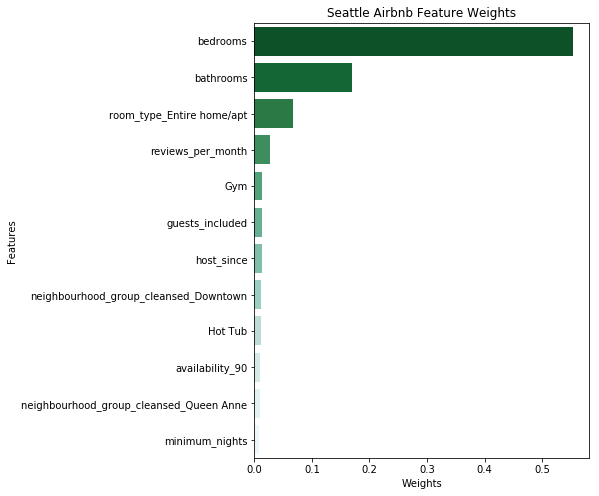

In [58]:
top_features = feature_weights.sort_values(by='Weights', ascending=False).head(12)

plt.figure(figsize=(6, 8))
ax = sns.barplot(x='Weights',y='Features',data=top_features,palette='BuGn_r')
ax.set_title('Seattle Airbnb Feature Weights')

Looking at the top features in Seattle above, the top 5 categories for renting a home through Airbnb in Seattle are - 

1. No.of Bedrooms
3. No.of bathrooms in the property
3. Entire Apt/home available for rent
4. No.of reviews per month for the listing
5. If the property has a Gym

### Question 2 : What is the distribution of Airbnb prices in Seattle?

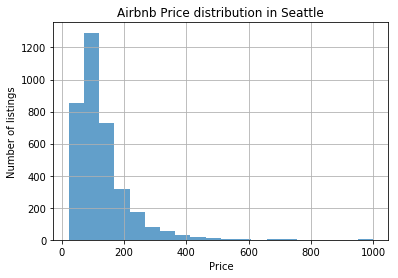

In [60]:
df_listings_2.price.hist(bins=20, alpha=0.7);                                                                                            
plt.title("Airbnb Price distribution in Seattle");   
plt.xlabel('Price');
plt.ylabel('Number of listings');

From above price distribution, it is evident that majority of the listings have price less than 300$. Lets see it in further detail

In [62]:
df_listings_2.price.max(),df_listings_2.price.min(),df_listings_2.price.mean()

(1000.0, 22.0, 127.37534857780257)

In [64]:
len(df_listings_2[(df_listings_2['price'] <= 300)])/len(df_listings_2)

0.9592861126603458

Astonishingly 95% of the listings in our cleaned data have a price less than or equal to USD 300.However there are some outliers where the price ranges upto **USD 1000**. The most expensive listing in Seattle amounts to **USD 1000**
The mean listing price in Seattle is **USD 127** for Airbnb properties

### Question 3 : What are the most expensive areas to rent in Seattle?

In [65]:
df_listings_1.neighbourhood_group_cleansed.nunique()

17

No handles with labels found to put in legend.


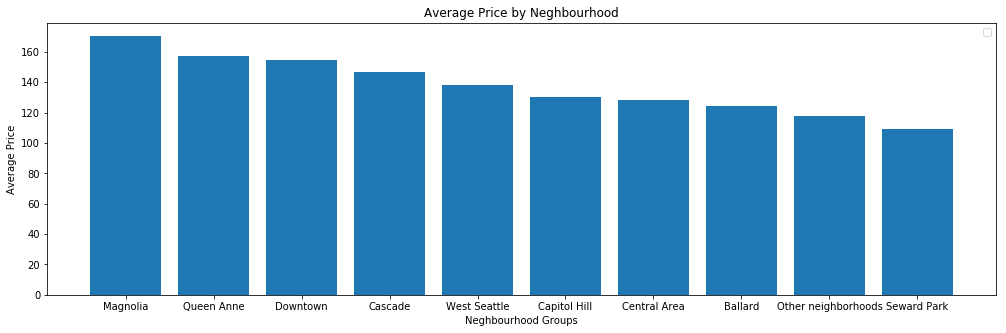

In [66]:
neighbourhood_avgprice = df_listings_1.groupby('neighbourhood_group_cleansed',as_index=False)['price'].mean().sort_values(by='price', ascending=False).head(10)

plt.figure(figsize=(17, 5))
plt.bar(neighbourhood_avgprice.neighbourhood_group_cleansed, neighbourhood_avgprice.price)
plt.title('Average Price by Neghbourhood')
plt.xlabel('Neghbourhood Groups')
plt.ylabel('Average Price')
plt.legend()

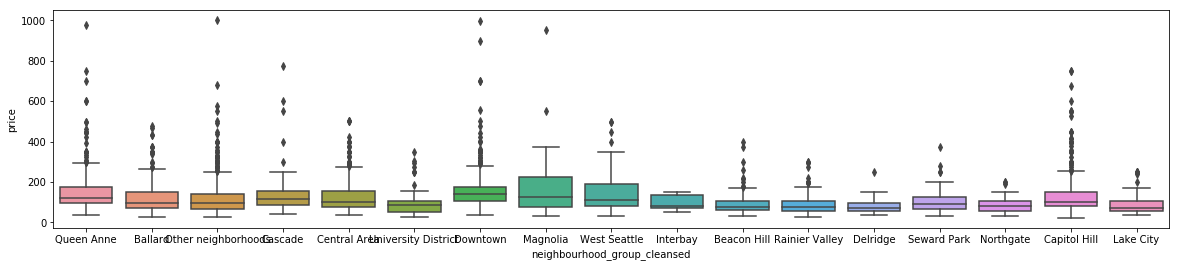

In [68]:
plt.figure(figsize=(20, 4))
sns.boxplot(df_listings_1.neighbourhood_group_cleansed, df_listings_1.price);

There is data available for 17 neighborhood groups in Seattle in Airbnb listing data. Notable observations are - 

1. Magnoalia and West Seattle have the highest spread in prices where as Capitol hill, Downtown, Queen Anne have quite a few outliers which might imply that these neighborhoods have the most no.of expensive properties for rent in Seattle

2. If we look at average prices by neighborhoods, Magnolia, Queen Anne, Downtown and Capitol Hill have the highest average prices which is confirmed by the box plot as price range for these neighborhoods are relatively higher. Central Seattle, Ballard and Seward park have lowest average prices

To support this further, our Decision tree Regressor model also suggests that Queen Anne, Downtown and Capitol Hill neighborhoods are one of the most prominent factors for predicting listing prices in Seattle

### Conclusion

Top 5 categories for renting a home through Airbnb in Seattle are - 

1. No.of Bedrooms
3. No.of bathrooms in the property
3. Entire Apt/home available for rent
4. No.of reviews per month for the listing
5. If the property has a Gym



Astonishingly 95% of the listings in our cleaned data have a price less than or equal to USD 300.However there are some outliers where the price ranges upto **USD 1000**. The most expensive listing in Seattle amounts to **USD 1000**
The mean listing price in Seattle is **USD 127** for Airbnb properties




Out of 17 neighbourhood groups in Seattle in Airbnb listing data, Notable observations are - 
1. Magnoalia and West Seattle have the highest spread in prices where as Capitol hill, Downtown, Queen Anne have quite a few outliers which might imply that these neighbourhoods have the most no.of expensive properties for rent in Seattle

2. If we look at average prices by neighbourhood, Magnolia, Queen Anne, Downtown and Capitol Hill have the highest average prices which is confirmed by the box plot as price range for these neighbourhoods are relatively higher. Central Seattle, Ballard and Seward park have lowest average prices

To support this further, our Decision tree Regressor model also suggests that Queen Anne, Downtown and Capitol Hill neighbourhoods are one of the most prominent factors for predicting listing prices in Seattle
